### Find all models

--- Random Forest ---
Accuracy: 0.7724
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123

--- Decision Tree ---
Accuracy: 0.6829
              precision    recall  f1-score   support

           0       0.55      0.49      0.52        43
           1       0.74      0.79      0.76        80

    accuracy                           0.68       123
   macro avg       0.65      0.64      0.64       123
weighted avg       0.68      0.68      0.68       123

--- Logistic Regression ---
Accuracy: 0.7886
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   ma

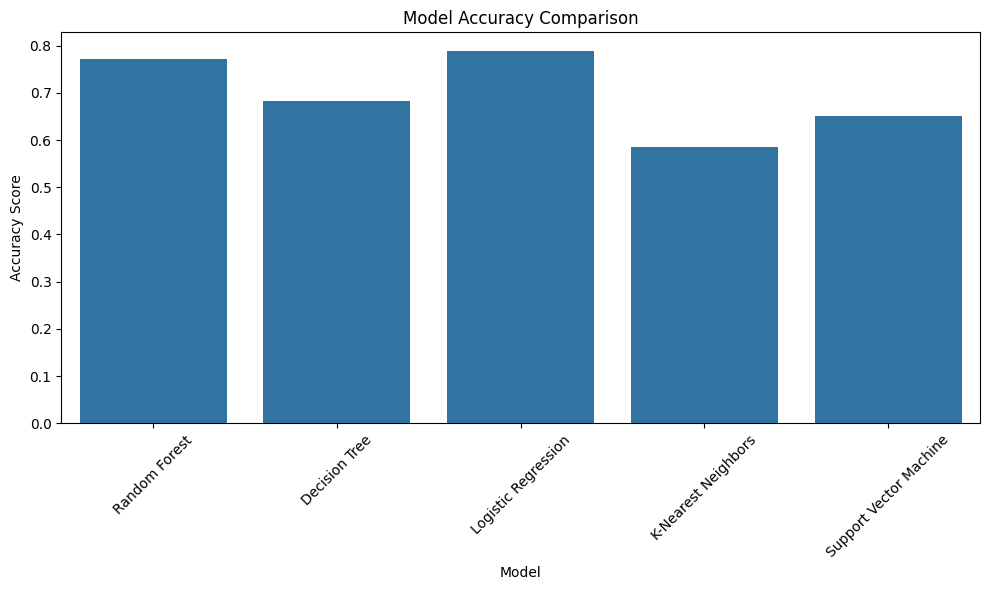

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3' and convert Dependents to numerical
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
label_encoder = LabelEncoder()
loan_train['Loan_Status'] = label_encoder.fit_transform(loan_train['Loan_Status'])

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train models and evaluate their performance
model_accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))

# Step 3: Visualize the results
plt.figure(figsize=(10, 6))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Random Forest Optimization

Best Hyperparameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Optimized Random Forest Accuracy: 0.7886
Optimized Random Forest F1-score: 0.8587
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



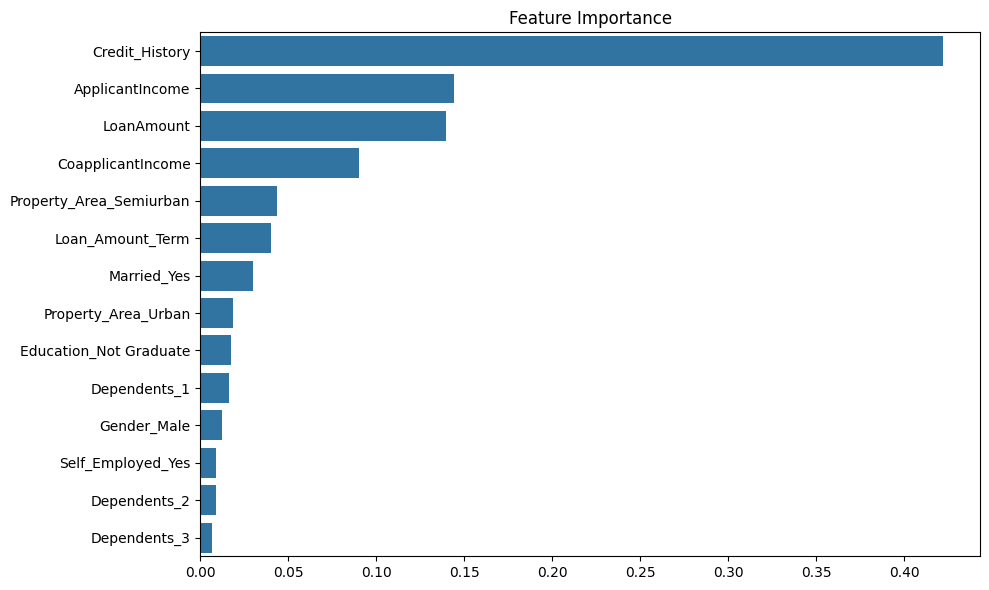

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3'
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 4: Use GridSearchCV for hyperparameter tuning (set n_jobs=1 to avoid multiprocessing issues)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=1, verbose=0)  # verbose=0 for minimum output
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Step 5: Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy and F1-score
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest F1-score: {f1:.4f}")

# Print classification report
print(classification_report(y_test, y_pred))

# Step 6: Visualize feature importance (Optional)
plt.figure(figsize=(10, 6))
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


### Class Weights and RandomizedSearchCV

Best Hyperparameters:  {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'bootstrap': True}
Optimized Random Forest Accuracy: 0.7724
Optimized Random Forest F1-score: 0.8427
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123



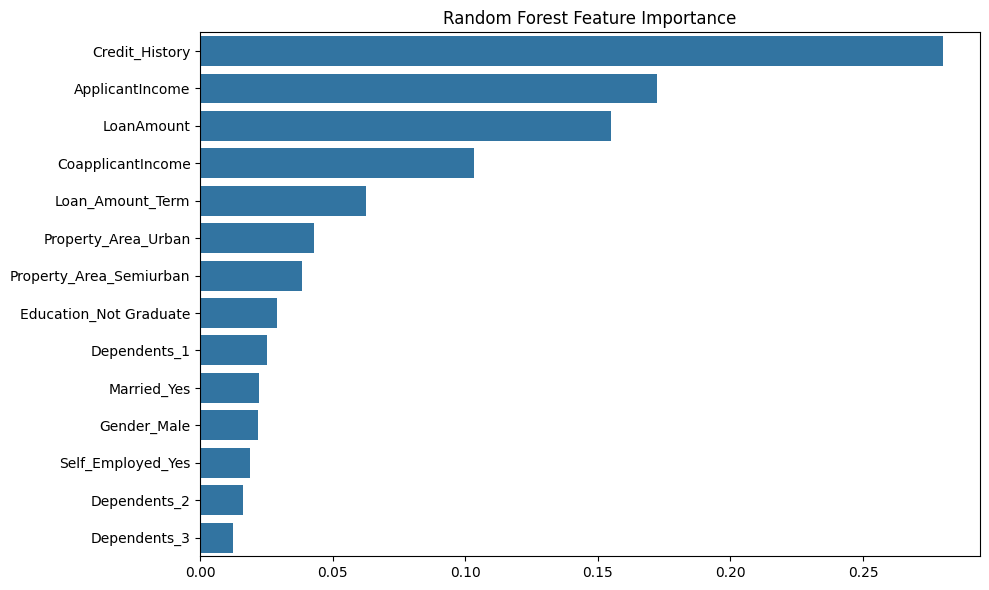

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3'
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 4: Define the hyperparameters grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest model with class weights to handle imbalance
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Step 5: Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model,
                                   param_distributions=param_distributions,
                                   n_iter=50,  # Increase number of iterations for better results
                                   cv=5, 
                                   scoring='f1', 
                                   n_jobs=-1, 
                                   verbose=0,  # Set verbose to 0 to suppress output
                                   random_state=42)

# Step 6: Fit the RandomizedSearchCV model
random_search.fit(X_train_res, y_train_res)

# Get the best model from the random search
best_rf_model = random_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters: ", random_search.best_params_)

# Step 7: Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy and F1-score
print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print(f"Optimized Random Forest F1-score: {f1:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Step 8: Visualize the feature importance (Optional)
plt.figure(figsize=(10, 6))
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

sns.barplot(x=importances[indices], y=[features[i] for i in indices])
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()


### Deep Learning techniques using Keras

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
loan_train = pd.read_csv('data/loan-train.csv')

# Step 1: Clean the data
# Separate categorical and numerical columns
categorical_cols = loan_train.select_dtypes(include=['object']).columns
numerical_cols = loan_train.select_dtypes(exclude=['object']).columns

# Fill missing values: Categorical columns with mode, Numerical columns with mean
for col in categorical_cols:
    loan_train[col].fillna(loan_train[col].mode()[0], inplace=True)

for col in numerical_cols:
    loan_train[col].fillna(loan_train[col].mean(), inplace=True)

# Replace '3+' in Dependents with '3'
loan_train['Dependents'] = loan_train['Dependents'].replace('3+', '3')

# One-hot encode categorical variables using pd.get_dummies
loan_train = pd.get_dummies(loan_train, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'], drop_first=True)

# Encoding Loan_Status as it is the target variable
loan_train['Loan_Status'] = loan_train['Loan_Status'].map({'Y': 1, 'N': 0})

# Step 2: Prepare the data
X = loan_train.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_train['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Step 4: Build the neural network model
model = Sequential()

# Input layer and two hidden layers with dropout to prevent overfitting
model.add(Dense(128, activation='relu', input_shape=(X_train_res.shape[1],)))
model.add(Dropout(0.3))  # Dropout to prevent overfitting
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 5: Train the model
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test), epochs=100, batch_size=32, callbacks=[early_stopping], verbose=0)

# Step 6: Evaluate the model on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy and F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy and F1-score
print(f"Deep Learning Model Accuracy: {accuracy:.4f}")
print(f"Deep Learning Model F1-score: {f1:.4f}")

# Print detailed classification report
print(classification_report(y_test, y_pred))

# Step 7: Visualize the training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'distutils'